In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [32]:
df = pd.read_csv('titanic_dataset.csv')

In [33]:
df.shape

(889, 17)

In [34]:
df.head()

,PassengerId,sur_status,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_total,ifSurvived,passenger_class,survival_status,embarkation_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,No,3rd,Perished,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Yes,1st,Survived,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Yes,3rd,Survived,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Yes,1st,Survived,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,No,3rd,Perished,Southampton


In [9]:
list(df)

['PassengerId',
 'sur_status',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Embarked_total',
 'ifSurvived',
 'passenger_class',
 'survival_status',
 'embarkation_port']

In [10]:
df.dtypes

PassengerId           int64
sur_status            int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Embarked_total        int64
ifSurvived           object
passenger_class      object
survival_status      object
embarkation_port     object
dtype: object

## Objective of this Study
This dataset has the following categorical features:

Survived: 1 = Yes, 0= No
Pclass (Passenger Class): 1,2,3
Sex: Male, Female
Embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton


Just tried to find the relationship among all four categorical column

In [53]:
def make_pivot(param1, param2):
    df_slice = df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], aggfunc=np.size, fill_value=0)
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    plt.show() 
    return slice_pivot, p_chart  


## Relation between passengers' survival and booking class

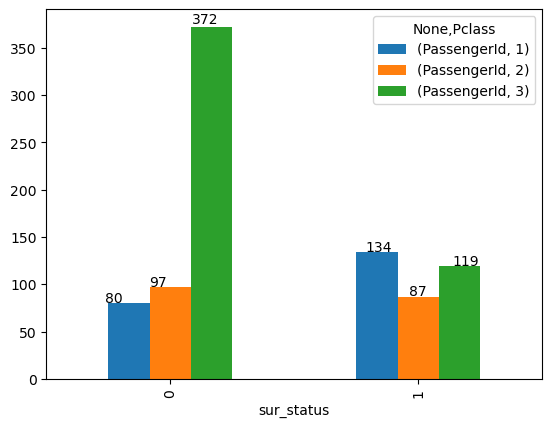

           PassengerId         
Pclass               1   2    3
sur_status                     
0                   80  97  372
1                  134  87  119


In [54]:
data, chart = make_pivot('sur_status', 'Pclass')
print(data)

## 2) Relation between passengers' survival and their sex

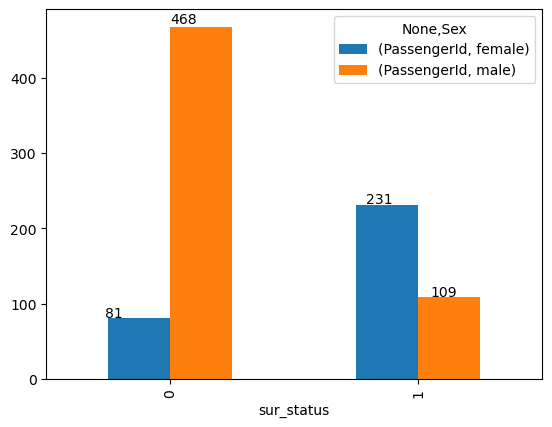

           PassengerId     
Sex             female male
sur_status                 
0                   81  468
1                  231  109


In [56]:
data, chart = make_pivot('sur_status','Sex')
print(data)

## 3) Relation between passengers' survival and port of embarkation

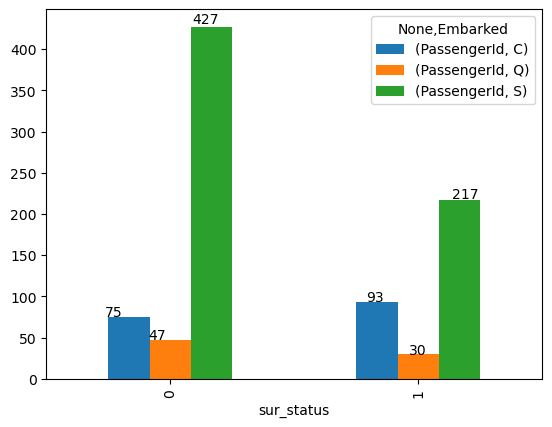

           PassengerId         
Embarked             C   Q    S
sur_status                     
0                   75  47  427
1                   93  30  217


In [57]:
data, chart = make_pivot('sur_status','Embarked')
print(data)

## Relation between passengers' booking class and their sex

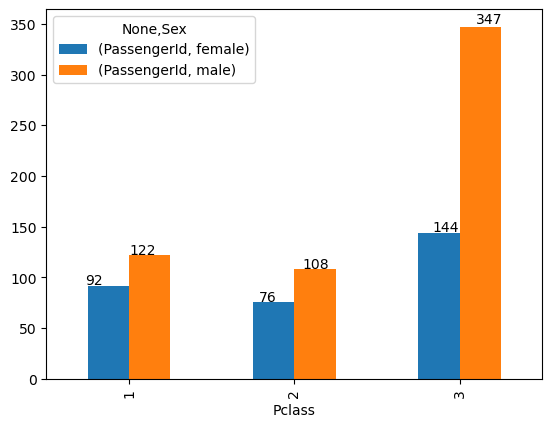

       PassengerId     
Sex         female male
Pclass                 
1               92  122
2               76  108
3              144  347


In [58]:
data, chart = make_pivot ('Pclass','Sex')
print(data)

## Relation between passengers' booking class and port of embarkation

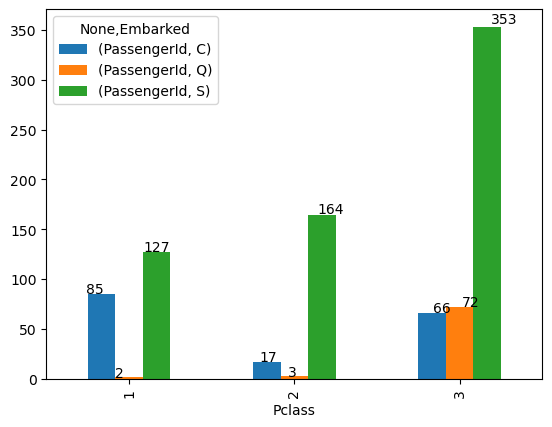

In [59]:
data, chart = make_pivot ('Pclass','Embarked')

## Relation between passengers' sex and port of embarkation

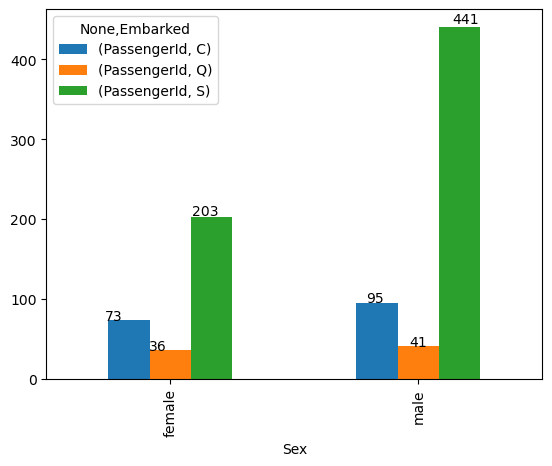

         PassengerId         
Embarked           C   Q    S
Sex                          
female            73  36  203
male              95  41  441


In [60]:
data, chart = make_pivot ('Sex','Embarked')
print(data)